In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw_analyst_ratings.csv")

df["date"] = pd.to_datetime(df["date"], errors="coerce")

df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [2]:
# data set summary
print("INFO:")
print(df.info())

print("\nSample rows:")
df.head()


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype                    
---  ------      --------------    -----                    
 0   Unnamed: 0  1407328 non-null  int64                    
 1   headline    1407328 non-null  object                   
 2   url         1407328 non-null  object                   
 3   publisher   1407328 non-null  object                   
 4   date        55987 non-null    datetime64[ns, UTC-04:00]
 5   stock       1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(4)
memory usage: 64.4+ MB
None

Sample rows:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


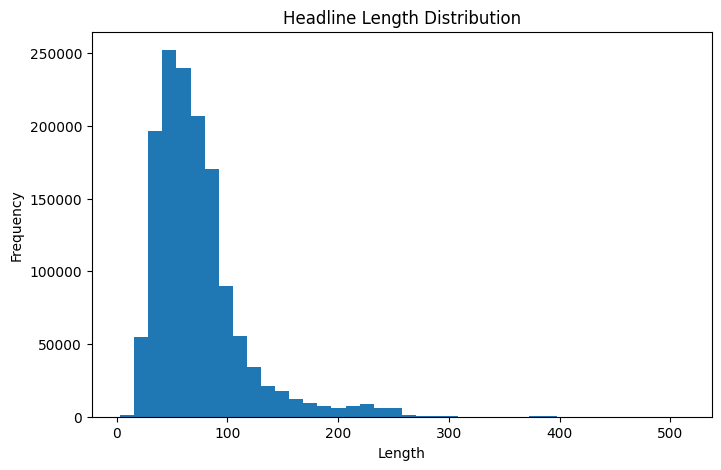

Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


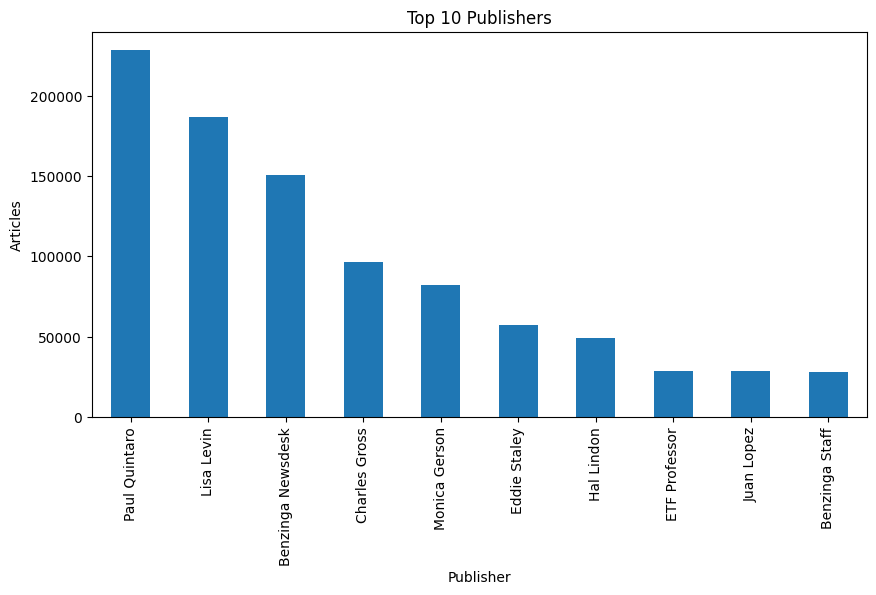

In [3]:
# descriptive statistics
# headlinke length
df["headline_length"] = df["headline"].str.len()
print(df["headline_length"].describe())
# plot
df["headline_length"].plot(kind="hist", bins=40, figsize=(8,5),
                           title="Headline Length Distribution")
plt.xlabel("Length")
plt.show()
# publisher analysis
publisher_counts = df["publisher"].value_counts()

print("Top Publishers:")
print(publisher_counts.head(10))
# plot
publisher_counts.head(10).plot(kind="bar", figsize=(10,5),
                               title="Top 10 Publishers")
plt.xlabel("Publisher")
plt.ylabel("Articles")
plt.show()


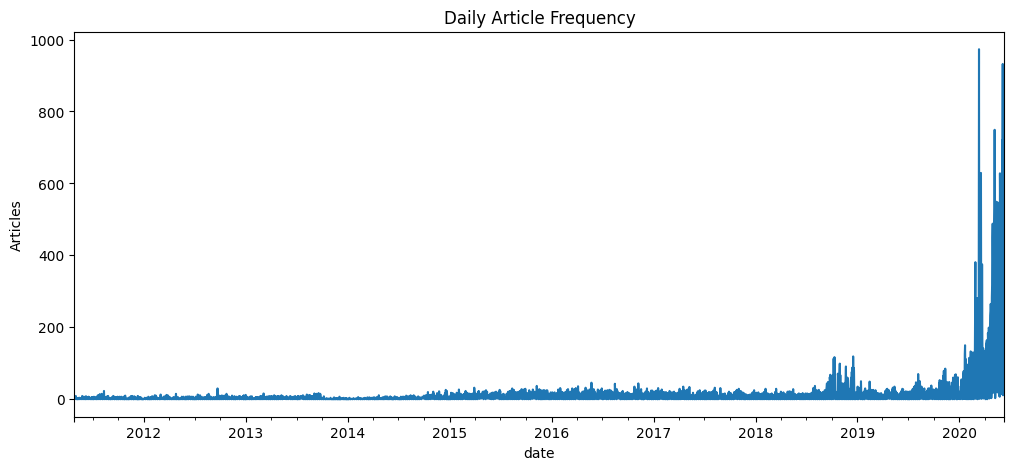

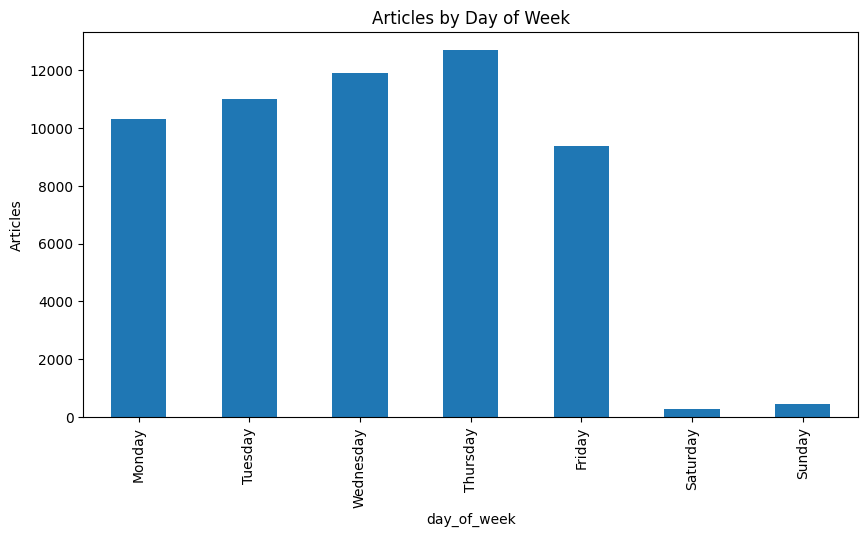

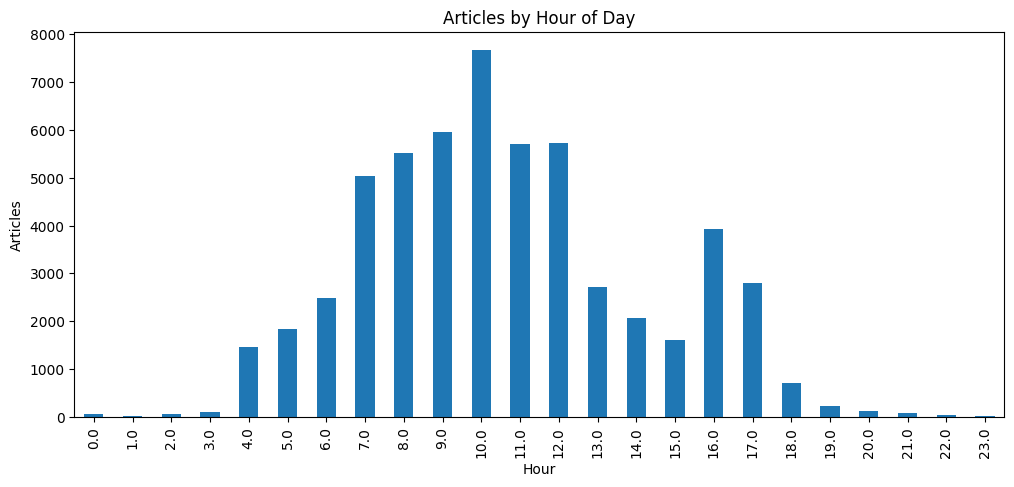

In [4]:
# time series analysis
daily_counts = df.set_index("date").resample("D").size()

daily_counts.plot(figsize=(12,5), title="Daily Article Frequency")
plt.ylabel("Articles")
plt.show()
# day of week
df["day_of_week"] = df["date"].dt.day_name()

df["day_of_week"].value_counts().reindex([
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
]).plot(kind="bar", figsize=(10,5),
        title="Articles by Day of Week")

plt.ylabel("Articles")
plt.show()
# hour of day
df["hour"] = df["date"].dt.hour

df["hour"].value_counts().sort_index().plot(kind="bar", figsize=(12,5),
                                            title="Articles by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Articles")
plt.show()


In [5]:
import nltk

nltk.download("punkt")
nltk.download("punkt_tab")   
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package punkt to /home/tsegaye/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/tsegaye/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tsegaye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tsegaye/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/tsegaye/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# nlp tokenaization and lemmatization
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()

    tokens = word_tokenize(text)

    tokens = [t for t in tokens if t.isalpha()]       # keep letters only
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return tokens

df["tokens"] = df["headline"].apply(clean_text)

df[["headline", "tokens"]].head()


,headline,tokens
0,Stocks That Hit 52-Week Highs On Friday,"[stock, hit, high, friday]"
1,Stocks That Hit 52-Week Highs On Wednesday,"[stock, hit, high, wednesday]"
2,71 Biggest Movers From Friday,"[biggest, mover, friday]"
3,46 Stocks Moving In Friday's Mid-Day Session,"[stock, moving, friday, session]"
4,B of A Securities Maintains Neutral on Agilent...,"[b, security, maintains, neutral, agilent, tec..."


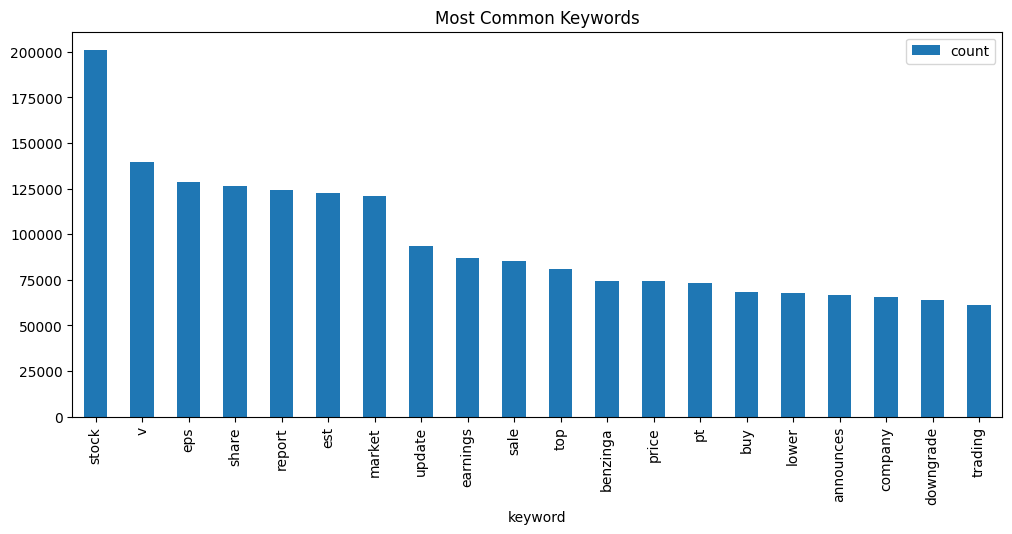

In [7]:
# top keywords
from collections import Counter

all_words = []

for token_list in df["tokens"]:
    all_words.extend(token_list)

keyword_counts = Counter(all_words).most_common(20)

pd.DataFrame(keyword_counts, columns=["keyword", "count"]).plot(
    x="keyword", y="count", kind="bar", figsize=(12,5),
    title="Most Common Keywords"
)

plt.show()
